In [1]:
!pip install transformers torch torchvision pillow


Loaded 2096 patches.


/Users/andreshofmann/.pyenv/versions/3.12.2/envs/.venv/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Preprocessed patches shape: torch.Size([2096, 3, 224, 224])
Embeddings shape: torch.Size([2096, 197, 768])
Reduced embeddings shape: (2096, 3)


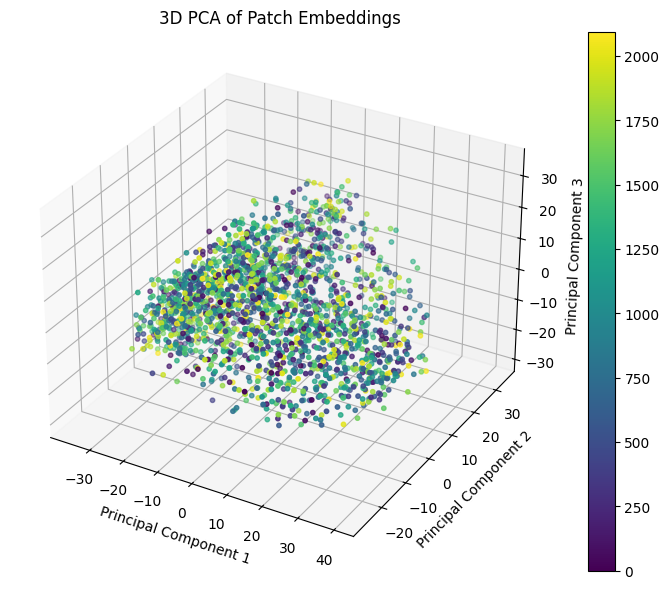

Loaded 2096 patches.


/Users/andreshofmann/.pyenv/versions/3.12.2/envs/.venv/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Preprocessed patches shape: torch.Size([2096, 3, 224, 224])
Embeddings shape: torch.Size([2096, 197, 768])
Reduced embeddings shape: (2096, 3)


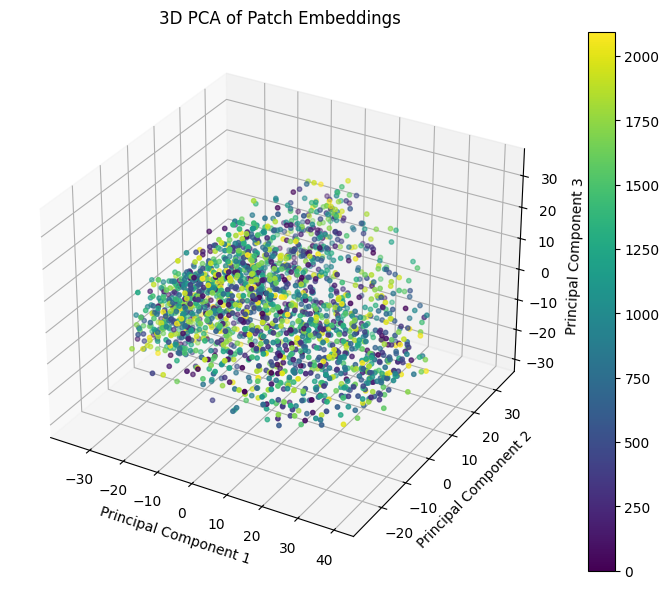

In [10]:
import os
from PIL import Image
import numpy as np
import torch
from transformers import ViTFeatureExtractor, ViTModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load patches
def load_patches(patches_dir):
    patches = []
    for filename in os.listdir(patches_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            filepath = os.path.join(patches_dir, filename)
            img = Image.open(filepath).convert('RGB')
            patches.append(img)
    return patches

# Preprocess patches
def preprocess_patches(patches, feature_extractor):
    pixel_values = feature_extractor(images=patches, return_tensors="pt").pixel_values
    return pixel_values

# Main function
def main(patches_dir):
    # Load patches
    patches = load_patches(patches_dir)
    print(f"Loaded {len(patches)} patches.")

    # Initialize feature extractor and preprocess patches
    feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
    pixel_values = preprocess_patches(patches, feature_extractor)
    print(f"Preprocessed patches shape: {pixel_values.shape}")

    # Load ViT model
    model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
    model.eval()

    # Extract embeddings
    with torch.no_grad():
        outputs = model(pixel_values)
        embeddings = outputs.last_hidden_state
    print(f"Embeddings shape: {embeddings.shape}")

    # Dimensionality reduction to 3 components
    pca = PCA(n_components=3)
    reduced_embeddings = pca.fit_transform(embeddings.reshape(len(embeddings), -1))
    print(f"Reduced embeddings shape: {reduced_embeddings.shape}")

    # Number of patches
    num_patches = len(reduced_embeddings)

    # Color values based on the number of patches
    color_values = np.arange(num_patches)

    # Plot in 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        reduced_embeddings[:, 0], 
        reduced_embeddings[:, 1], 
        reduced_embeddings[:, 2], 
        c=color_values, 
        cmap='viridis'
    )
    ax.set_title('3D PCA of Patch Embeddings')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.colorbar(scatter)
    plt.show()



Loaded 2096 patches.


/Users/andreshofmann/.pyenv/versions/3.12.2/envs/.venv/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Preprocessed patches shape: torch.Size([2096, 3, 224, 224])
Embeddings shape: torch.Size([2096, 197, 768])
Reduced embeddings shape: (2096, 3)


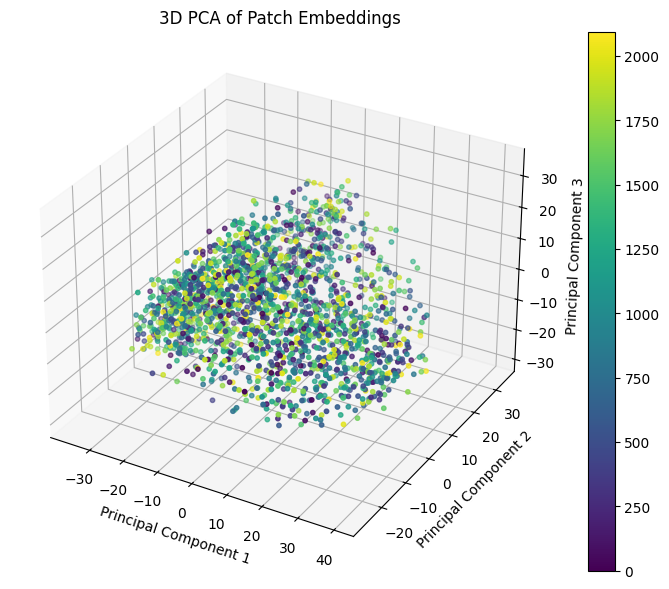

Loaded 2096 patches.


/Users/andreshofmann/.pyenv/versions/3.12.2/envs/.venv/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Preprocessed patches shape: torch.Size([2096, 3, 224, 224])
Embeddings shape: torch.Size([2096, 197, 768])
Reduced embeddings shape: (2096, 3)


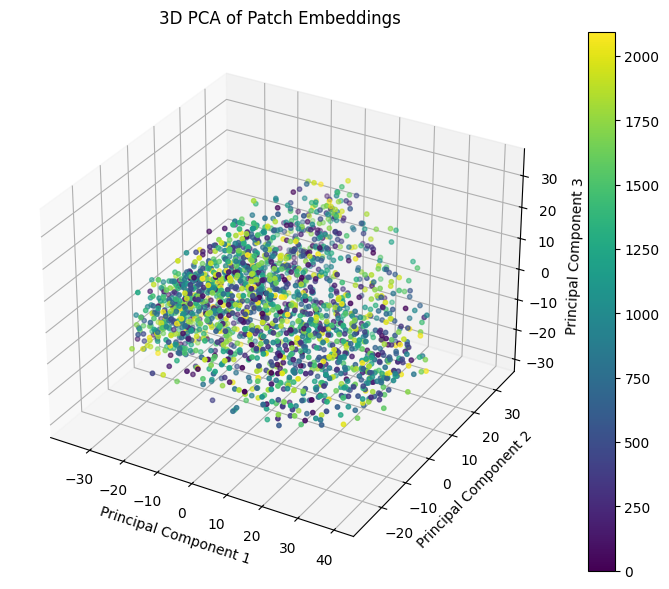

In [11]:
import os
from PIL import Image
import numpy as np
import torch
from transformers import ViTFeatureExtractor, ViTModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load patches
def load_patches(patches_dir):
    patches = []
    for filename in os.listdir(patches_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            filepath = os.path.join(patches_dir, filename)
            img = Image.open(filepath).convert('RGB')
            patches.append(img)
    return patches

# Preprocess patches
def preprocess_patches(patches, feature_extractor):
    pixel_values = feature_extractor(images=patches, return_tensors="pt").pixel_values
    return pixel_values

# Main function
def main(patches_dir):
    # Load patches
    patches = load_patches(patches_dir)
    print(f"Loaded {len(patches)} patches.")

    # Initialize feature extractor and preprocess patches
    feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
    pixel_values = preprocess_patches(patches, feature_extractor)
    print(f"Preprocessed patches shape: {pixel_values.shape}")

    # Load ViT model
    model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
    model.eval()

    # Extract embeddings
    with torch.no_grad():
        outputs = model(pixel_values)
        embeddings = outputs.last_hidden_state
    print(f"Embeddings shape: {embeddings.shape}")

    # Dimensionality reduction to 3 components
    pca = PCA(n_components=3)
    reduced_embeddings = pca.fit_transform(embeddings.reshape(len(embeddings), -1))
    print(f"Reduced embeddings shape: {reduced_embeddings.shape}")

    # Number of patches
    num_patches = len(reduced_embeddings)

    # Color values based on the number of patches
    color_values = np.arange(num_patches)

    # Plot in 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        reduced_embeddings[:, 0], 
        reduced_embeddings[:, 1], 
        reduced_embeddings[:, 2], 
        c=color_values, 
        cmap='viridis',
        s=10  
    )
    ax.set_title('3D PCA of Patch Embeddings')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.colorbar(scatter)
    plt.show()

# Run the script
patches_dir = '../LEGO/data/patches/'  
main(patches_dir)

# Run the script
patches_dir = '../LEGO/data/patches/'  
main(patches_dir)